<h1 style="color:skyblue;">Abonados en Centros Municipales de la Comunidad de Madrid</h1>

<h2 style="color:skyblue;"><u><strong>Recopilación de métodos y fuentes.</strong></u></h2>


In [49]:
#importamos y cargamos nuestro dataset.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

import pprint
df = pd.read_csv("C:/Users/elena/local/EDA/CSV/abonados2025nuevo.csv",sep= "|",low_memory=False)

#df_abonados = pd.read_csv("C:/Users/elena/local/EDA/CSV/abonados2025nuevo.csv")

In [51]:
#A continuación, observamos la información del dataset, para ver cuántas filas y columnas tiene, así como el tipo de datos que contiene cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140516 entries, 0 to 140515
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nº de abonados      36781 non-null  float64
 1    Sexo               36781 non-null  object 
 2    Edad               36781 non-null  float64
 3   Tipo de abono       36781 non-null  object 
 4    Centro deportivo   36781 non-null  object 
 5    Mes                36781 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.4+ MB


<h4 style="color:skyblue;">Procedemos a ver su contenido en sus primeras filas.</h4>

In [52]:
# Como queremos ver el contenido del dataset, utilizamos el siguiente metodo para que nos muestre las primeras filas del mismo
# ya que tuvimos al principio ciertos problemas en la sepración de las columnas y tuvimos que introducirle separadores. 
df.head()

,Nº de abonados,Sexo,Edad,Tipo de abono,Centro deportivo,Mes
0,1.0,MUJER,17.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
1,1.0,MUJER,23.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
2,1.0,MUJER,38.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
3,1.0,MUJER,49.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
4,1.0,MUJER,51.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25


<h2 style="color:skyblue;"><u><strong>Limpieza de datos.</strong></u></h2>

In [ ]:
# visualizamos los valores de nulos a priori y que nos de su porcentaje. 
df.isna().mean() * 100

Nº de abonados        73.824333
 Sexo                 73.824333
 Edad                 73.824333
Tipo de abono         73.824333
 Centro deportivo     73.824333
 Mes                  73.824333
dtype: float64

In [ ]:
df ## queremos ver el dataset y su estructura

,Nº de abonados,Sexo,Edad,Tipo de abono,Centro deportivo,Mes
0,1.0,MUJER,17.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
1,1.0,MUJER,23.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
2,1.0,MUJER,38.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
3,1.0,MUJER,49.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
4,1.0,MUJER,51.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
...,...,...,...,...,...,...
140511,NaN,NaN,NaN,NaN,NaN,NaN
140512,NaN,NaN,NaN,NaN,NaN,NaN
140513,NaN,NaN,NaN,NaN,NaN,NaN
140514,NaN,NaN,NaN,NaN,NaN,NaN


<h4 style="color:skyblue;">Nos hemos encontrado con instancias que nos salen como nulos y posteriormente vamos a eliminarlas.</h4>

In [57]:
#Usamos el método dropna para eliminar las filas que tienen valores nulos.
df_limpio = df.dropna(how='all')

In [ ]:
df # En principio, se han eliminados los valores nulos del dataset.

In [58]:
# Volvemos a verificar que se hayan eliminado los valores nulos y comprobamos que existan duplicados, mas adelante veremos esto.
df_nulos = df[df.isnull().any(axis=1)]
df_duplicados = df[df.duplicated()]
df_combinado = pd.concat([df_nulos, df_duplicados]).drop_duplicates()

print(df_combinado)

       Nº de abonados    Sexo    Edad  Tipo de abono     Centro deportivo   \
36781              NaN     NaN     NaN            NaN                  NaN   
856                1.0   MUJER    49.0   ADM FAMILIAR  Antonio Díaz Miguel   
858                1.0   MUJER    51.0   ADM FAMILIAR  Antonio Díaz Miguel   
863                1.0   MUJER    57.0   ADM FAMILIAR  Antonio Díaz Miguel   
865                1.0   MUJER    58.0   ADM FAMILIAR  Antonio Díaz Miguel   
...                ...     ...     ...            ...                  ...   
33533              1.0  HOMBRE    58.0   ADM FAMILIAR            Moratalaz   
34017              1.0   MUJER    21.0   ADM FAMILIAR              Orcasur   
34827              1.0   MUJER    52.0   ADM FAMILIAR             Pradillo   
34849              1.0  HOMBRE    62.0   ADM FAMILIAR             Pradillo   
36590              1.0  HOMBRE    43.0   ADM FAMILIAR  Wilfred Agbonavbare   

          Mes  
36781     NaN  
856    ene-25  
858    ene-25  

In [60]:
def revisar_nulos_duplicados(df):
    """
    Imprime un resumen de valores nulos y filas duplicadas en un DataFrame.
    """
    print("Revisión de NULOS por columna (%):")
    nulos = df.isna().mean() * 100
    print(nulos[nulos > 0].sort_values(ascending=False))

    print("\nRecuento total de FILAS duplicadas:")
    duplicados = df.duplicated().sum()
    print(f"{duplicados} fila(s) duplicada(s) encontradas.")

In [61]:
revisar_nulos_duplicados(df)

Revisión de NULOS por columna (%):
Nº de abonados        73.824333
 Sexo                 73.824333
 Edad                 73.824333
Tipo de abono         73.824333
 Centro deportivo     73.824333
 Mes                  73.824333
dtype: float64

Recuento total de FILAS duplicadas:
103835 fila(s) duplicada(s) encontradas.


In [62]:
print(df.duplicated().sum()) #suma de los duplicados 

103835


In [64]:
print(df.isnull().sum())

Nº de abonados        103735
 Sexo                 103735
 Edad                 103735
Tipo de abono         103735
 Centro deportivo     103735
 Mes                  103735
dtype: int64


<h4 style="color:red;">INCIDENTE DE ELIMINACIÓN DE NULOS.</h4>

In [ ]:
# Al tener la duda de porque me siguen saliendo dejo este incidente
# y vuelvo a verificar que se puedan borrar los nulos existentes. 

In [65]:
df = df.dropna()  #vuelvo a usar el metodo dropna para eliminar los nulos

In [66]:
df.head(100) #Esta vez observo principalmente los 100 primero por si hubiese modificado algo ajeno a los nulos.

,Nº de abonados,Sexo,Edad,Tipo de abono,Centro deportivo,Mes
0,1.0,MUJER,17.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
1,1.0,MUJER,23.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
2,1.0,MUJER,38.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
3,1.0,MUJER,49.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
4,1.0,MUJER,51.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
...,...,...,...,...,...,...
95,2.0,HOMBRE,70.0,ADM REDUCIDO,Alfredo Goyeneche,ene-25
96,1.0,HOMBRE,71.0,ADM REDUCIDO,Alfredo Goyeneche,ene-25
97,5.0,HOMBRE,72.0,ADM REDUCIDO,Alfredo Goyeneche,ene-25
98,2.0,HOMBRE,73.0,ADM REDUCIDO,Alfredo Goyeneche,ene-25


In [67]:
# A continuacion vamos a ver los tips de objetos que tenemos en el dataframe.
# Le solicitamos que nos de la informacion de los tipos de datos que tiene el dataframe.

print("Filas y columnas:", df.shape)
print("\nNombres de columnas:\n", df.columns)
print("\nTipos de datos:\n", df.dtypes)
df.info()

Filas y columnas: (36781, 6)

Nombres de columnas:
 Index(['Nº de abonados ', ' Sexo ', ' Edad ', 'Tipo de abono ',
       ' Centro deportivo ', ' Mes'],
      dtype='object')

Tipos de datos:
 Nº de abonados        float64
 Sexo                  object
 Edad                 float64
Tipo de abono          object
 Centro deportivo      object
 Mes                   object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 36781 entries, 0 to 36780
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nº de abonados      36781 non-null  float64
 1    Sexo               36781 non-null  object 
 2    Edad               36781 non-null  float64
 3   Tipo de abono       36781 non-null  object 
 4    Centro deportivo   36781 non-null  object 
 5    Mes                36781 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.0+ MB


<h10 style="color:skyblue;">Una vez limpiado el dataframe, vamos a intentar obtener un breve resumen de los datos que tenemos hasta ahora.</h10>

<h14 style="color:skyblue;">

| Fila       | Significado                                                      |
|------------|------------------------------------------------------------------|
| **count**  | Cuántos valores hay en cada columna (no nulos)                   |
| **unique** | Solo para columnas categóricas: cuántos valores únicos hay       |
| **top**    | El valor más frecuente, la moda, en columnas categóricas         |
| **freq**   | Frecuencia del valor más común                                   |
| **mean**   | Media  — solo para columnas numéricas                            |
| **std**    | Desviación estándar — qué tan dispersos están los datos          |
| **min**    | Valor mínimo                                                     |
| **25%**    | Primer cuartil (25% de los datos están por debajo de este valor) |
| **50%**    | Mediana (50% de los datos por debajo, 50% por encima)            |
| **75%**    | Tercer cuartil (75% de los datos están por debajo de este valor) |
| **max**    | Valor máximo                                                     |</h14>

In [ ]:
df.describe(include='all')

,Nº de abonados,Sexo,Edad,Tipo de abono,Centro deportivo,Mes
count,36781.000000,36781,36781.000000,36781,36781,36781
unique,NaN,2,NaN,7,63,3
top,NaN,MUJER,NaN,ADM USO LIBRE,Antonio Díaz Miguel,mar-25
freq,NaN,18496,NaN,13560,1577,12469
mean,2.617384,NaN,49.266034,NaN,NaN,NaN
std,3.464033,NaN,19.039991,NaN,NaN,NaN
min,1.000000,NaN,-1.000000,NaN,NaN,NaN
25%,1.000000,NaN,33.000000,NaN,NaN,NaN
50%,2.000000,NaN,51.000000,NaN,NaN,NaN
75%,3.000000,NaN,64.000000,NaN,NaN,NaN


<h10 style="color:skyblue;">Es interesante ya que de aquellas columnas que nos aparece NaN es por que se puede calcular,   
poniendo un ejemplo, es difícil sacar el tercer cuartil del tipo de abono por lo que nos da Nan.</h10>

<h10 style="color:skyblue;">Para aclarar lo anterior, si volvemos a verificar los nulos nos daría lo siguiente:</h10>

In [82]:
df.isnull().sum()    

nº_de_abonados      0
sexo                0
edad                0
tipo_de_abono       0
centro_deportivo    0
mes                 0
dtype: int64

<h10 style="color:skyblue;">Cómo comentabamos anteriormente, respecto a los duplicados.  
Al verificar cuantos duplicados existen nos da 101.</h10>

In [83]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 101


<h10 style="color:skyblue;"> Hacemos una primera visualización, ya que es posible que  
los duplicados que existan debamos dejarlos porque pueden ser relevantes para nuestro analisis.</h10>

In [ ]:
def detectar_duplicados_por_columna(df):
    """
    Muestra:
    1. Número total de filas duplicadas completas.
    2. Las filas duplicadas completas.
    3. Columnas que tienen valores duplicados de forma individual.
    """
    print("Total de FILAS duplicadas completas:", df.duplicated().sum())
    
    # Mostrar las filas duplicadas completas
    filas_duplicadas = df[df.duplicated()]
    if not filas_duplicadas.empty:
        print("\n Filas duplicadas completas:")
        display(filas_duplicadas)
    else:
        print(" No hay filas completamente duplicadas.")
    
    print("\n Columnas con valores duplicados:")
    for col in df.columns:
        duplicados_columna = df[col].duplicated().sum()
        if duplicados_columna > 0:
            print(f" Columna '{col}': {duplicados_columna} valores duplicados")


In [88]:
detectar_duplicados_por_columna(df)

Total de FILAS duplicadas completas: 101

 Filas duplicadas completas:


,nº_de_abonados,sexo,edad,tipo_de_abono,centro_deportivo,mes
856,1.0,MUJER,49.0,ADM FAMILIAR,Antonio Díaz Miguel,ene-25
858,1.0,MUJER,51.0,ADM FAMILIAR,Antonio Díaz Miguel,ene-25
863,1.0,MUJER,57.0,ADM FAMILIAR,Antonio Díaz Miguel,ene-25
865,1.0,MUJER,58.0,ADM FAMILIAR,Antonio Díaz Miguel,ene-25
896,1.0,HOMBRE,56.0,ADM FAMILIAR,Antonio Díaz Miguel,ene-25
...,...,...,...,...,...,...
33533,1.0,HOMBRE,58.0,ADM FAMILIAR,Moratalaz,mar-25
34017,1.0,MUJER,21.0,ADM FAMILIAR,Orcasur,mar-25
34827,1.0,MUJER,52.0,ADM FAMILIAR,Pradillo,mar-25
34849,1.0,HOMBRE,62.0,ADM FAMILIAR,Pradillo,mar-25



 Columnas con valores duplicados:
🔸 Columna 'nº_de_abonados': 36719 valores duplicados
🔸 Columna 'sexo': 36779 valores duplicados
🔸 Columna 'edad': 36685 valores duplicados
🔸 Columna 'tipo_de_abono': 36774 valores duplicados
🔸 Columna 'centro_deportivo': 36718 valores duplicados
🔸 Columna 'mes': 36778 valores duplicados


<h10 style="color:skyblue;">Al analizar los valores duplicados y como mencionabamos,  
es importante dejarlos puesto que todas las columnas en las que se encuentran,  
es posible e importante que se repitan los datos, por ejemplo es posible que tengamos duplicados en "edad","Tipo de abono" , etc,   
por lo que vamos a continuar haciendo en analisis sin eliminar los valores duplicados.</h10>

<h10 style="color:skyblue;">Análisis de los valores únicos por columna:</h10>

In [89]:
for col in df.columns:
    print(f"\nColumna: {col}")
    print("Valores únicos:", df[col].nunique())
    print(df[col].value_counts().head())


Columna: nº_de_abonados
Valores únicos: 62
nº_de_abonados
1.0    18305
2.0     7579
3.0     3896
4.0     2244
5.0     1390
Name: count, dtype: int64

Columna: sexo
Valores únicos: 2
sexo
MUJER     18496
HOMBRE    18285
Name: count, dtype: int64

Columna: edad
Valores únicos: 96
edad
53.0    707
54.0    704
58.0    694
50.0    694
49.0    690
Name: count, dtype: int64

Columna: tipo_de_abono
Valores únicos: 7
tipo_de_abono
ADM USO LIBRE                                 13560
ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO     9051
ADM REDUCIDO                                   4600
ADM COMPLETO                                   3694
ADM ACTIVIDAD DIRIGIDA                         3297
Name: count, dtype: int64

Columna: centro_deportivo
Valores únicos: 63
centro_deportivo
Antonio Díaz Miguel             1577
Las Cruces                      1545
Dirección General de Deporte    1416
Francisco Fernández Ochoa       1415
Fuente del Berro                1253
Name: count, dtype: int64

Columna: mes

<h10 style="color:skyblue;">Una vez hemos obtenido los valores únicos del dataframe  
vamos a obtener la cardinalidad:</h10>

In [22]:
cardinalidad = df.nunique()

print(cardinalidad)

Nº de abonados        62
 Sexo                  2
 Edad                 96
Tipo de abono          7
 Centro deportivo     63
 Mes                   3
dtype: int64


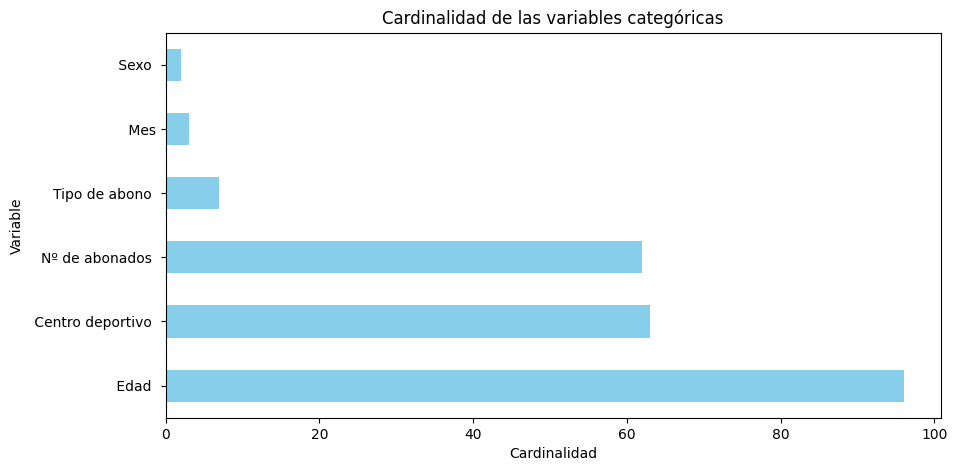

In [23]:
df.nunique().sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title('Cardinalidad de las variables categóricas')
plt.xlabel('Cardinalidad')
plt.ylabel('Variable')
plt.show()

In [94]:
def calcular_cardinalidad_y_tipo(df):
    """
    Calcula la cardinalidad de cada columna y determina si son numéricas o categóricas.
    """
    # Inicializar diccionarios para clasificar columnas
    columnas_numericas = []
    columnas_categoricas = []

    # Calcular la cardinalidad y clasificar las columnas
    for col in df.columns:
        # Calcular cardinalidad
        cardinalidad = df[col].nunique()

        # Clasificar si la columna es numérica o categórica
        if df[col].dtype in ['int64', 'float64']:
            columnas_numericas.append((col, cardinalidad))
        else:
            columnas_categoricas.append((col, cardinalidad))

    # Mostrar los resultados
    print("Cardinalidad y Tipo de Columnas:")
    print("\n Columnas Numéricas:")
    for col, cardinalidad in columnas_numericas:
        print(f"- {col}: {cardinalidad} valores únicos")

    print("\n Columnas Categóricas:")
    for col, cardinalidad in columnas_categoricas:
        print(f"- {col}: {cardinalidad} valores únicos")

In [95]:
calcular_cardinalidad_y_tipo(df)

Cardinalidad y Tipo de Columnas:

 Columnas Numéricas:
- nº_de_abonados: 62 valores únicos
- edad: 96 valores únicos

 Columnas Categóricas:
- sexo: 2 valores únicos
- tipo_de_abono: 7 valores únicos
- centro_deportivo: 63 valores únicos
- mes: 3 valores únicos


In [96]:
def calcular_cardinalidad_y_porcentaje(df):
    """
    Muestra la cardinalidad (número de valores únicos) y su porcentaje respecto al total de filas.
    """
    total_filas = len(df)
    
    print(f"Total de filas en el DataFrame: {total_filas}\n")
    print(f"{'Columna':<25} {'Cardinalidad':<15} {'Porcentaje (%)'}")
    print("-" * 60)
    
    for col in df.columns:
        cardinalidad = df[col].nunique()
        porcentaje = (cardinalidad / total_filas) * 100
        print(f"{col:<25} {cardinalidad:<15} {porcentaje:.2f}%")

In [97]:
calcular_cardinalidad_y_porcentaje(df)

Total de filas en el DataFrame: 36781

Columna                   Cardinalidad    Porcentaje (%)
------------------------------------------------------------
nº_de_abonados            62              0.17%
sexo                      2               0.01%
edad                      96              0.26%
tipo_de_abono             7               0.02%
centro_deportivo          63              0.17%
mes                       3               0.01%


<h10 style="color:skyblue;">YA tenemos calculada la cardinalidad y conocemos los valores unicos,  
lo cual, nos permite comenzar a analizar cada columna.</h10>

<h2 style="color:skyblue;"><u><strong>Análisis de cada columna.</strong></u></h2>

In [98]:
df.head()

,nº_de_abonados,sexo,edad,tipo_de_abono,centro_deportivo,mes
0,1.0,MUJER,17.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
1,1.0,MUJER,23.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
2,1.0,MUJER,38.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
3,1.0,MUJER,49.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25
4,1.0,MUJER,51.0,ADM ACTIVIDAD DIRIGIDA,Alfredo Goyeneche,ene-25


<h2 style="color:skyblue;">Analisis previo de las columnas:</h2>

<h8 style="color:skyblue;">Edad</h8>

In [25]:
print(df.columns)

Index(['Nº de abonados ', ' Sexo ', ' Edad ', 'Tipo de abono ',
       ' Centro deportivo ', ' Mes'],
      dtype='object')


In [99]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

<Axes: xlabel='edad', ylabel='Count'>

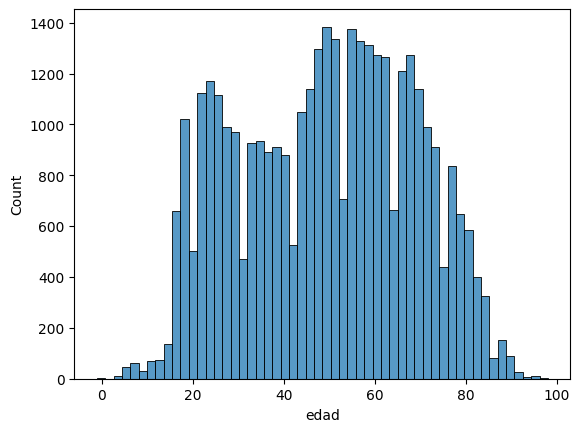

In [ ]:
sns.histplot(data=df, x='edad') 

<h8 style="color:skyblue;">Sexo</h8>

<Axes: xlabel='sexo', ylabel='Count'>

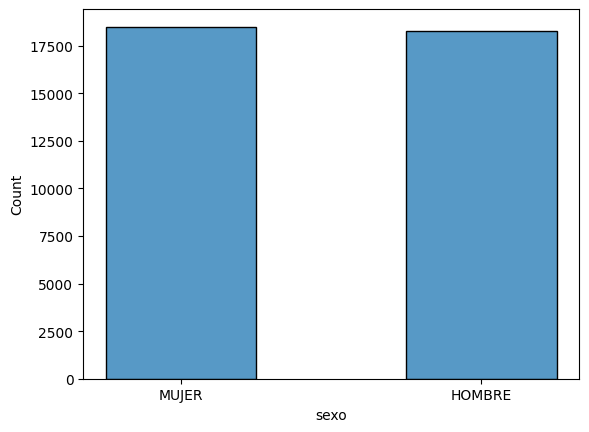

In [127]:
sns.histplot(data=df, x='sexo',shrink=0.5)

<h8 style="color:skyblue;">Mes</h8>

<Axes: xlabel='mes', ylabel='Count'>

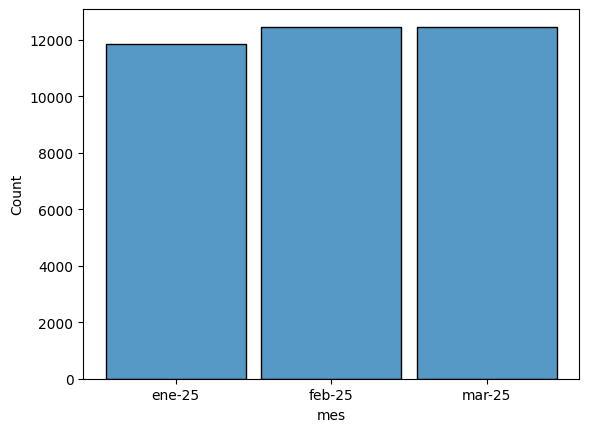

In [ ]:
sns.histplot(data=df, x='mes',shrink=0.9)

In [157]:
def histograma_mes_abonados_tipo(df, mes_col='mes', abonados_col='nº_de_abonados',bins=12):
   
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=df,
        x=mes_col,
        weights=df[abonados_col],
        multiple='stack',
        shrink=0.5, 
        bins=bins,)
    plt.title("Distribución de abonados por mes ")
    plt.xlabel("Mes")
    plt.ylabel("Número de abonados")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

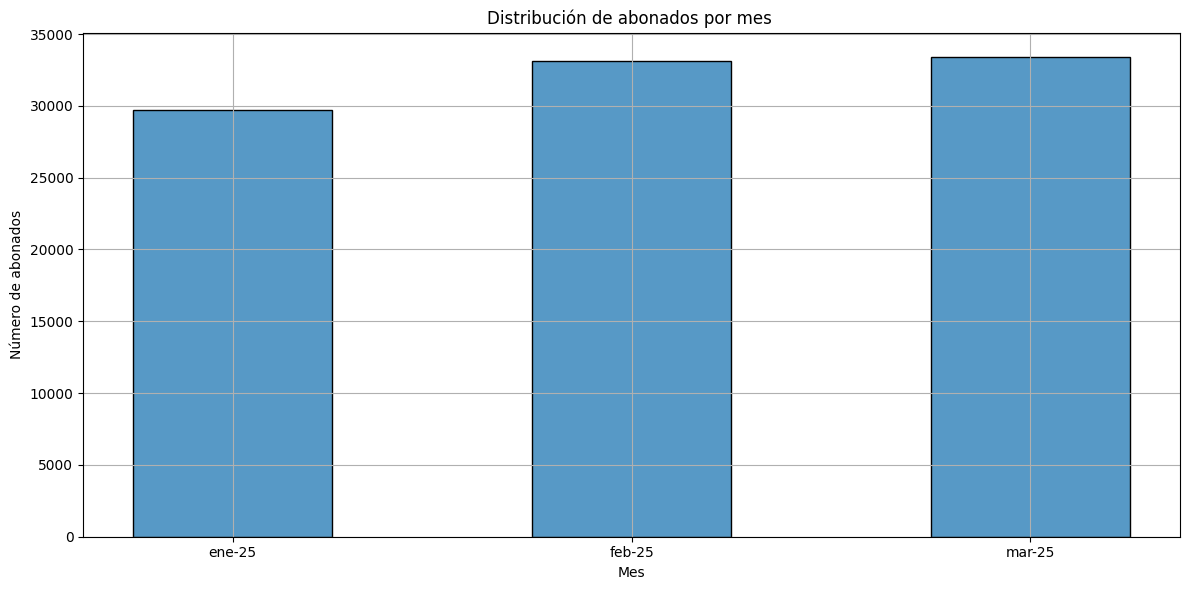

In [158]:
histograma_mes_abonados_tipo(df)

<h8 style="color:skyblue;">Centro deportivo</h8>



In [159]:
def histograma_centro_deportivo(df, columna='centro_deportivo', rotacion=45, tamaño_figura=(12, 6)):
    conteo = df[columna].value_counts()
    plt.figure(figsize=tamaño_figura)
    plt.bar(conteo.index, conteo.values)
    plt.xticks(rotation=rotacion, ha='right')  # alineación derecha mejora la legibilidad
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {columna}")
    plt.tight_layout()
    plt.show()
    return conteo

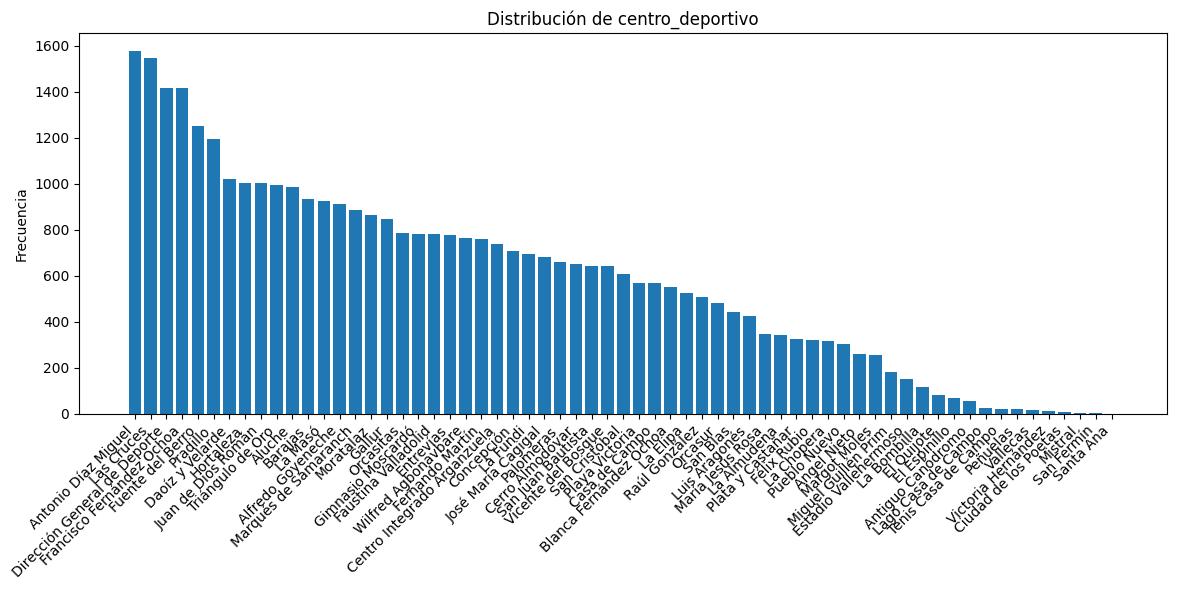

centro_deportivo
Antonio Díaz Miguel             1577
Las Cruces                      1545
Dirección General de Deporte    1415
Francisco Fernández Ochoa       1415
Fuente del Berro                1253
                                ... 
Victoria Hernández                13
Ciudad de los Poetas               9
Mistral                            3
San Fermín                         3
Santa Ana                          1
Name: count, Length: 63, dtype: int64


In [160]:
conteo_abonos = histograma_centro_deportivo(df)
print(conteo_abonos)

<h8 style="color:skyblue;">Nº de Abonados</h8>

In [161]:

def histograma_numero_abonados(df, columna='nº_de_abonados', binwidth=1):
    """
    Genera un histograma de la distribución del número de abonados.
    """
    plt.figure(figsize=(10, 5))

    sns.histplot(
        data=df,
        x=columna,
        binwidth=binwidth,        # Intervalos de agrupación
        color='skyblue',
        edgecolor='black'
    )

    plt.title('Distribución del Número de Abonados', fontsize=14)
    plt.xlabel('Nº de Abonados', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

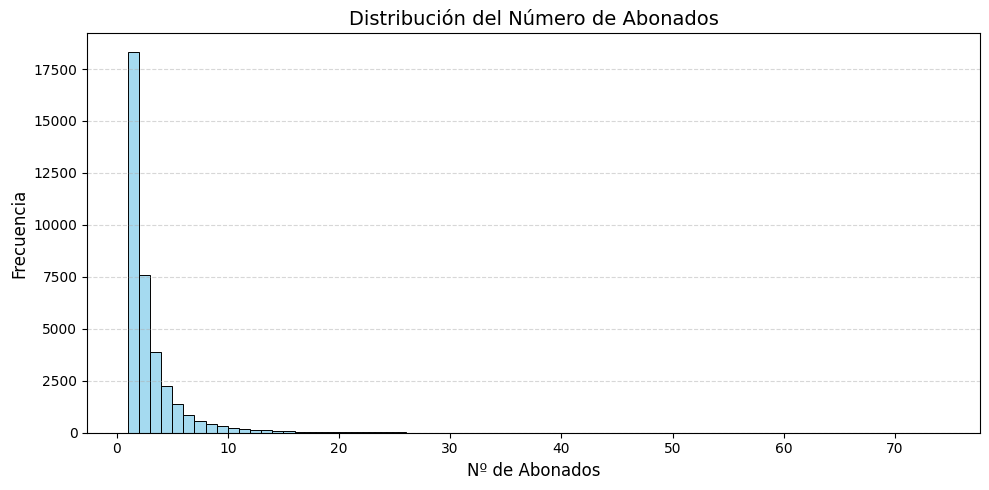

In [162]:
histograma_numero_abonados(df)


In [ ]:
def histograma_horizontal_edad_abonados(df, edad_col='edad', abonados_col='nº_de_abonados'):
    
    plt.figure(figsize=(10, 8))

    sns.histplot(
        data=df,
        y=edad_col,                   # Pone la edad en el eje Y
        weights=df[abonados_col],    # Suma el número de abonados por edad
        binrange=(0, 100),           # Limita edades de 0 a 100
        binwidth=1,                  # Agrupa por edad de 1 en 1
        color='skyblue',
        edgecolor='black',
        orientation='horizontal'     # Histograma horizontal
    )

    plt.title('Número de Abonados por Edad (0–100)', fontsize=14)
    plt.xlabel('Número de Abonados', fontsize=12)
    plt.ylabel('Edad', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

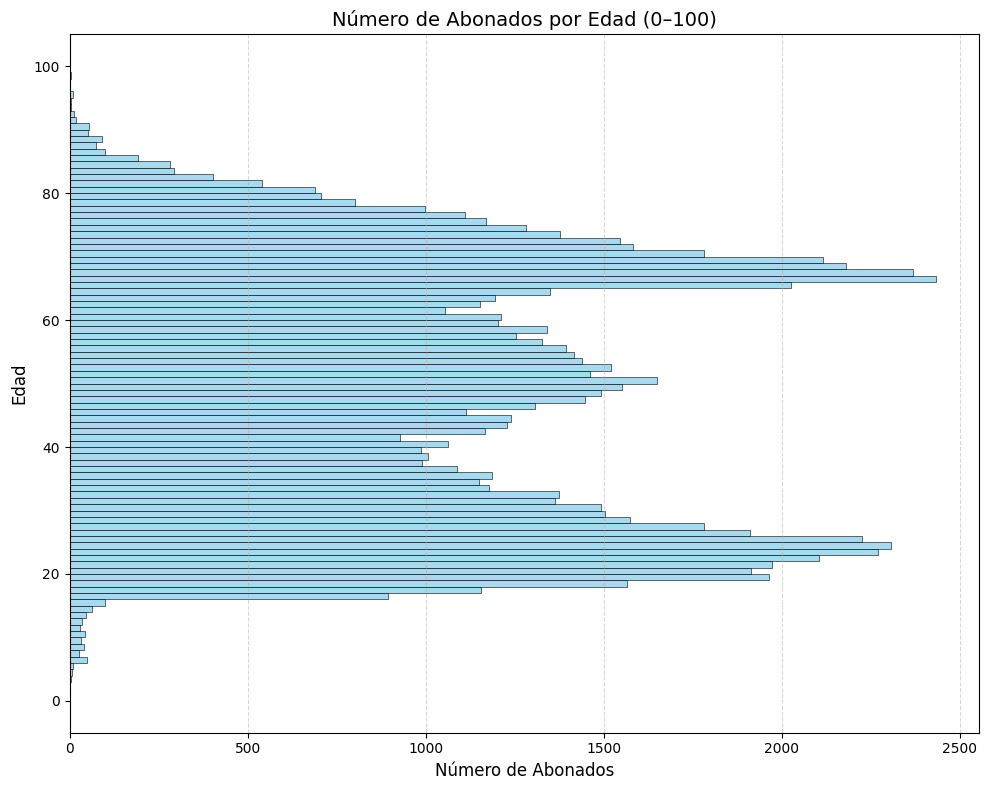

In [172]:
histograma_horizontal_edad_abonados(df)

<h8 style="color:skyblue;">Tipo de abono</h8>

In [173]:
def histograma_tipo_de_abono(df, columna='tipo_de_abono', rotacion=45, tamaño_figura=(12, 6)):
    conteo = df[columna].value_counts()
    plt.figure(figsize=tamaño_figura)
    plt.bar(conteo.index, conteo.values)
    plt.xticks(rotation=rotacion, ha='right')  # alineación derecha mejora la legibilidad
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {columna}")
    plt.tight_layout()
    plt.show()
    return conteo

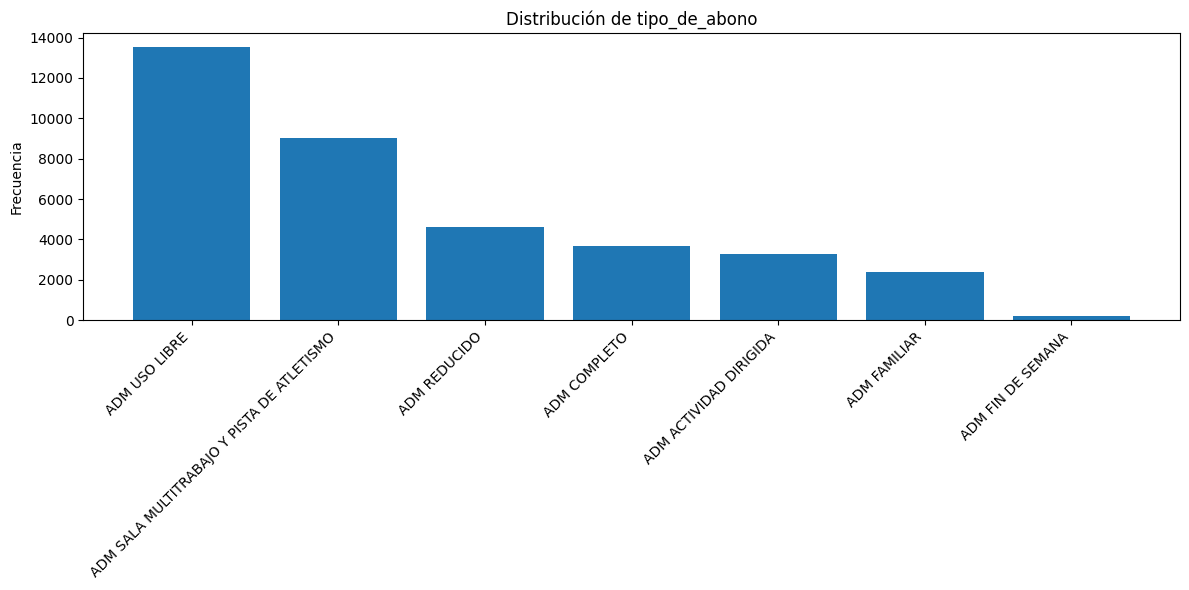

tipo_de_abono
ADM USO LIBRE                                 13558
ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO     9050
ADM REDUCIDO                                   4600
ADM COMPLETO                                   3694
ADM ACTIVIDAD DIRIGIDA                         3297
ADM FAMILIAR                                   2394
ADM FIN DE SEMANA                               185
Name: count, dtype: int64


In [174]:
conteo_abonos = histograma_tipo_de_abono(df)
print(conteo_abonos)

<h2 style="color:skyblue;"><u><strong>Análisis detallado de las columnas</strong></u></h2>

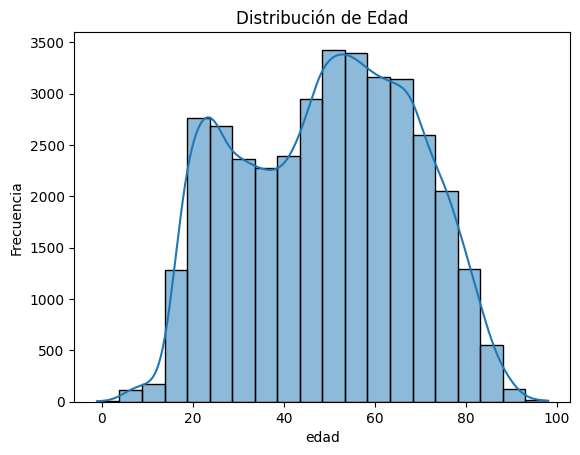

In [35]:
# Histograma para la columna 'Edad'
sns.histplot(data=df, x='edad', bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel("edad")
plt.ylabel("Frecuencia")
plt.show()

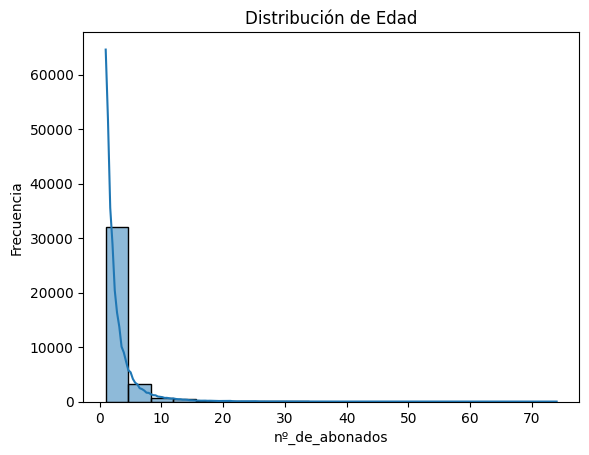

In [36]:
# Histograma para la columna 'Numerod de Abonados'
sns.histplot(data=df, x='nº_de_abonados', bins=20, kde=True)
plt.title("Distribución de Edad")
plt.xlabel('nº_de_abonados')
plt.ylabel("Frecuencia")
plt.show()

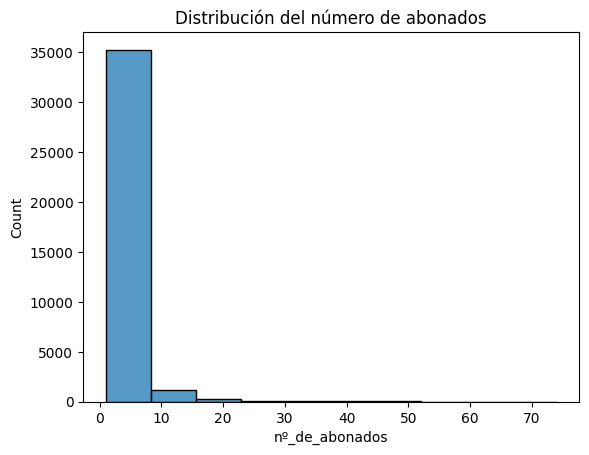

mes
ene-25    29709.0
feb-25    33147.0
mar-25    33414.0
Name: nº_de_abonados, dtype: float64

In [37]:
# Ver distribución
sns.histplot(df['nº_de_abonados'], bins=10)
plt.title("Distribución del número de abonados")
plt.show()

# Total de abonados por tipo de abono
df.groupby('tipo_de_abono')['nº_de_abonados'].sum().sort_values(ascending=False)

# Abonados por mes (si tuvieras más meses)
df.groupby('mes')['nº_de_abonados'].sum()

<h2 style="color:skyblue;"><u><strong>Elaboración de hipotesis</strong></u></h2>

<h10 style="color:skyblue;">La hipotesis madre va orientada a si sería viable la creación de nuevos tipos de abonos orientados a los grupos de edad,  
 tendremos en cuenta la variable de sexo, centros municipales, y los tipos de abonos  
 para poder llegar a una conclusión en la que no se nos escape información.</h10>

<h10 style="color:skyblue;">Siguiendo la línea de la hipotesis anterior, haremos un estudio de las franjas de edad e identeificar que abonos son los menos utilizados según la edad,  
para poder promocionarlo o bien analizar si son eficientes para poder tomar futuras decisiones sobre ellos.</h10>

<h10 style="color:skyblue;">Para conocer mas sobre nuestra hipotesis, y teniendo en cuenta que ambas van enfocadas a la variable de edad y sus posibles usos   
en los centros municpales nos planteamos las siguientes preguntas:</h10>

<h10 style="color:skyblue;">1.-¿Cuál consideramos que es el tipo de abono más utilizado?</h10>  

<h10 style="color:skyblue;">2.-¿Existe alguna relación en el ADM FIN DE SEMANA con la edad de las personas que lo solicitan?</h10>  

<h10 style="color:skyblue;">3.-¿En que rango de edad se dsitribuyen los tipos de abonos?</h10>

<h10 style="color:skyblue;">4.-¿Existe relación entre la edad y el número de abonados?</h10>


### ¿Cuál consideramos que es el tipo de abono más utilizado?

In [39]:
def histograma_tipo_de_abono(df, columna='tipo_de_abono', rotacion=45, tamaño_figura=(12, 6)):
    conteo = df[columna].value_counts()
    plt.figure(figsize=tamaño_figura)
    plt.bar(conteo.index, conteo.values)
    plt.xticks(rotation=rotacion, ha='right')  # alineación derecha mejora la legibilidad
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {columna}")
    plt.tight_layout()
    plt.show()
    return conteo

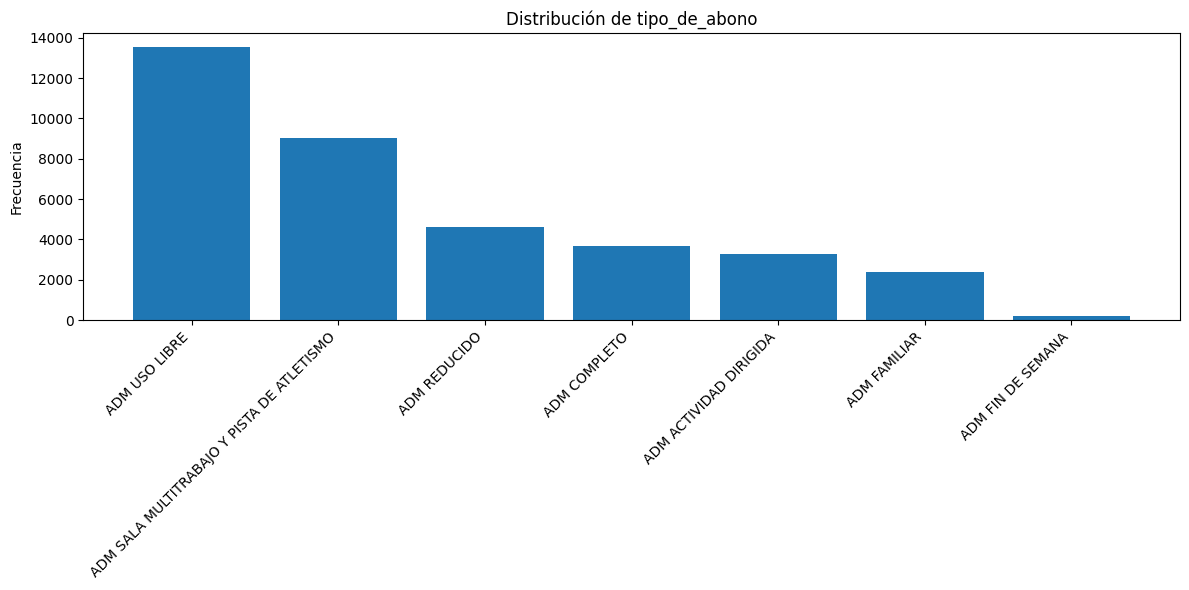

tipo_de_abono
ADM USO LIBRE                                 13560
ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO     9051
ADM REDUCIDO                                   4600
ADM COMPLETO                                   3694
ADM ACTIVIDAD DIRIGIDA                         3297
ADM FAMILIAR                                   2394
ADM FIN DE SEMANA                               185
Name: count, dtype: int64


In [40]:
conteo_abonos = histograma_tipo_de_abono(df)
print(conteo_abonos)

### ¿Existe alguna relación en el ADM FIN DE SEMANA con la edad de las personas que lo solicitan?

In [41]:
def histograma_edad(df, columna='edad', rotacion=45, tamaño_figura=(12, 6)):
    conteo = df[columna].value_counts()
    plt.figure(figsize=tamaño_figura)
    plt.bar(conteo.index, conteo.values)
    plt.xticks(rotation=rotacion, ha='right')  # alineación derecha mejora la legibilidad
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {columna}")
    plt.tight_layout()
    plt.show()
    return conteo

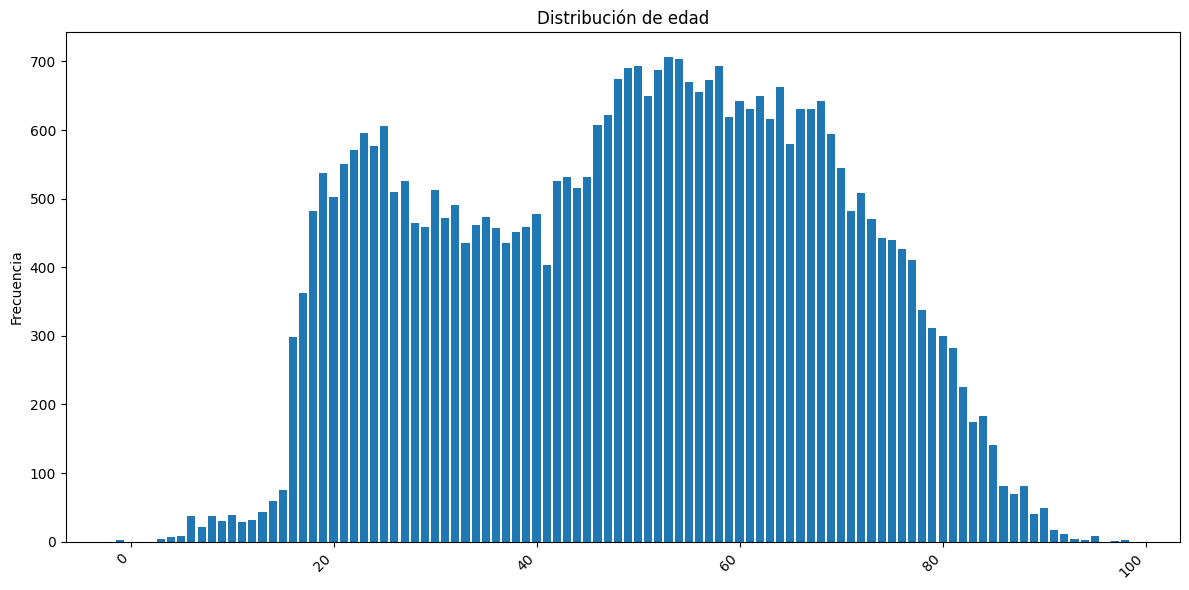

edad
 53.0    707
 54.0    704
 58.0    694
 50.0    694
 49.0    690
        ... 
 93.0      4
-1.0       3
 98.0      3
 94.0      3
 97.0      1
Name: count, Length: 96, dtype: int64


In [42]:
conteo_abonos = histograma_edad(df)
print(conteo_abonos)

<h10 style="color:skyblue;">3.-¿En que rango de edad se dsitribuyen los tipos de abonos?</h10>

<Axes: xlabel='edad', ylabel='Count'>

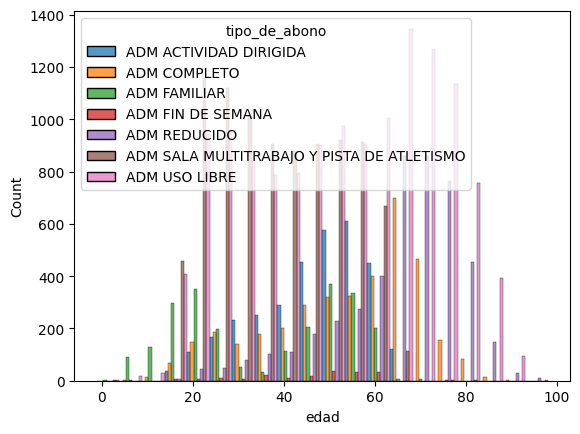

In [43]:
sns.histplot(data=df, x='edad', hue='tipo_de_abono', multiple='dodge', bins=20)

#### Coincide la edad laboral con el ADM FIN DE SEMANA. Sin embargo el ADM completo la edad que mas lo usa es entre los 60-70. 

#### En que edad es el pico de número de abonados.

In [44]:
def histograma_edad_abonados(df, edad_col='edad', abonados_col='nº_de_abonados', bins=20):
    """
    Genera un histograma ponderado que muestra la cantidad total de abonados por edad.
    
    Parámetros:
    - df: DataFrame con los datos.
    - edad_col: nombre de la columna de edad.
    - abonados_col: nombre de la columna de número de abonados.
    - bins: número de intervalos (bins) para agrupar las edades.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=edad_col,
        weights=df[abonados_col],
        bins=bins,
        kde=False,
        color='skyblue'
    )
    plt.title("Histograma de número de abonados por edad")
    plt.xlabel("Edad")
    plt.ylabel("Número de abonados")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

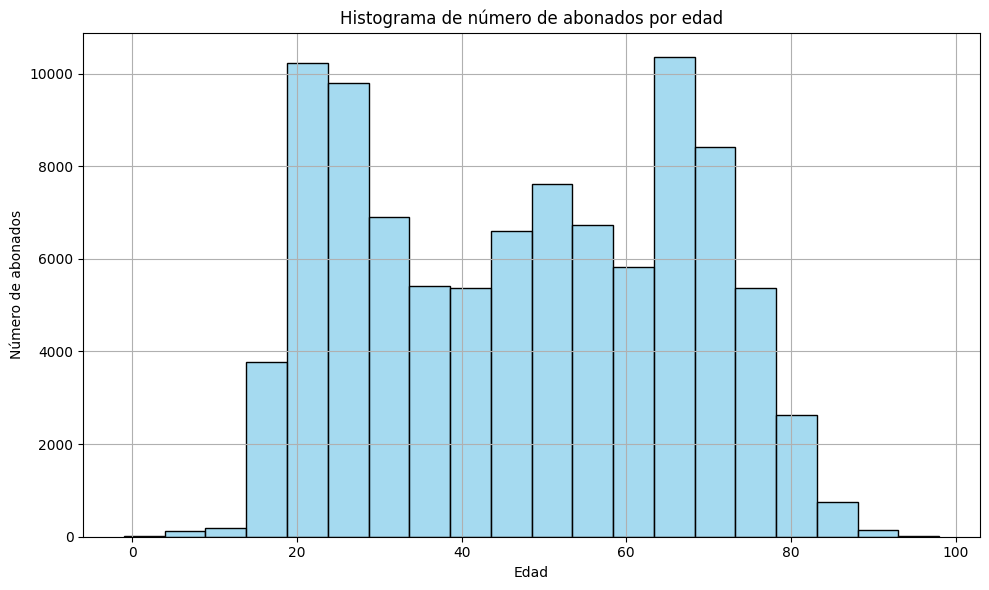

In [45]:
histograma_edad_abonados(df)


##### Tendríamos dos picos de edad para el número de abonados, una de ellas a los 20 y otra a partir de los 60. 

##### Una vez que tenemos las edades en las que se puede observar la mayor demanda de inscripciones en los centros, nos surge la curiosidad de que tipo de abono es del que se hace uso por la franja de edad, para ello vamos a realizar la siguiente funcion que nos de una visualización de que tipo de abono y podremos sacar la conclusion o relación de edad-tipo de abono. 

In [47]:
def histograma_edad_abonados_tipo(df, edad_col='edad', abonados_col='nº_de_abonados', tipo_col='tipo_de_abono', bins=20):
    """
    Crea un histograma ponderado por número de abonados y segmentado por tipo de abono.
    
    Parámetros:
    - df: DataFrame con los datos.
    - edad_col: columna con edades.
    - abonados_col: columna con número de abonados.
    - tipo_col: columna con tipo de abono.
    - bins: número de grupos de edad.
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=df,
        x=edad_col,
        weights=df[abonados_col],
        hue=tipo_col,
        multiple='stack',
        bins=bins,
        palette='Set2'
    )
    plt.title("Distribución de abonados por edad y tipo de abono")
    plt.xlabel("Edad")
    plt.ylabel("Número de abonados")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

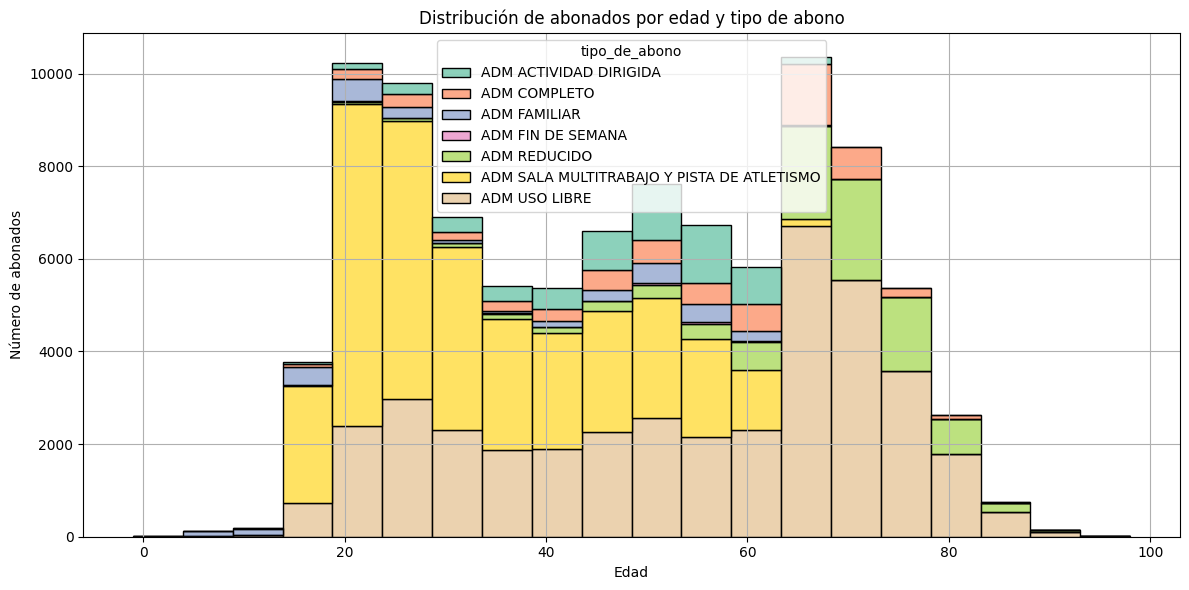

In [48]:
histograma_edad_abonados_tipo(df)

##### En conlcusión, podemos observar una gran relación de ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO con las edades mas tempranas, posteriormente va disminuyendo y coge gran fuerza las actividades ADM REDUCIDO en las edades a partir de los 60. Y otro dato llamativo es el pico de de ADM ACTIVIDAD DIRIGIDA lo tiene en las edades comprendidas entre los 40-60. Ya que nos puede dar otras conclusiones relacionadas a temas importantes como el estilo de vida, movilidad de los usarios, etc.

<h10 style="color:skyblue;">En esta situación y respondiendo a nuestra hipotesis central nos resulta interesante centrarnos en si sería posible  
crear ciertas "ofertas" a nivel de negocio para ese tramo de edad ya que como podemos observar en el anterior histograma recoge mucha fuerza las edades de los 20 a los 50 en ADM MULTITRABAJO Y ATLETISMO.
Y al mismo tiempo centrarnos en por ejemplo en ADM ACTIVIDAD DIRIGIDA porque razón no esta siendo tan potente en los menores de 20.</h10>  


In [ ]:

## he eanalizado la edad en la qe mas se usa la multitrabajo y atletismo pata ver si puede ser efectivo sacar un bono o bien analizar las edades q no se usa.
## entonces heoms creaod primero la funcion para verlo y despues el histograma. 

def analizar_abono(df, tipo_de_abono):
    """
    Filtra y analiza la columna de tipo de abono, enfocándose en un abono específico.

    Parámetros:
    - df (pd.DataFrame): DataFrame que contiene los datos.
    - nombre_abono (str): Nombre del abono que se quiere analizar.

    Retorna:
    - DataFrame filtrado con ese abono.
    - Conteo de frecuencia del abono.
    """
    # Aseguramos que el nombre de la columna sea el correcto
    col = 'tipo_de_abono'

    # Filtrar filas que contienen el abono deseado (puede estar dentro de una cadena más larga)
    df_filtrado = df[df[col].str.contains(tipo_de_abono, case=False, na=False)]

    # Conteo de frecuencias
    conteo = df_filtrado[col].value_counts()

    return df_filtrado, conteo

In [182]:
abono = 'ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO'
df_filtrado, conteo = analizar_abono(df, abono)
print(conteo)

tipo_de_abono
ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO    9050
Name: count, dtype: int64


In [186]:
def histograma_abono(df_filtrado, columna_numerica):
    """
    Genera un histograma para una columna numérica en el DataFrame filtrado.

    Parámetros:
    - df_filtrado (pd.DataFrame): DataFrame previamente filtrado.
    - columna_numerica (str): Columna sobre la cual se desea hacer el histograma.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(df_filtrado[columna_numerica].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna_numerica} para ADM SALA MULTITRABAJO Y PISTA DE ATLETISMO')
    plt.xlabel(columna_numerica)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

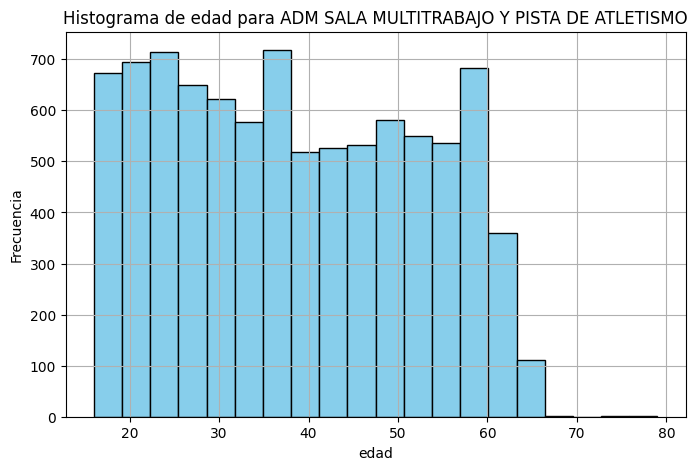

In [187]:
histograma_abono(df_filtrado, 'edad')


<h10 style="color:skyblue;">Confirmamos el tramo de edad mas frecuente en el uso de este tipo de ADM, y en consecuencia ya podemos crear  
ofertas que lo hagan mas rentable.</h10>  

<h10 style="color:skyblue;"> Ya tenemos demostrado que tipo de abono es el mas usado según la edad,  
por consiguiente podemos tomar decisiones en base a los resultados de nuestro EDA.</h10>  

<h10 style="color:skyblue;"> Sin embargo y en relación a la segunda hipotesis, observamos que el ADM de actividad dirigida no tiene demanda en edades inferiores a 40  
lo cual es una información muy valiosa puesto que es lo que nos están solicitando, para poder invertir en ello.</h10>  

In [231]:
def analizar_abono(df, tipo_de_abono):
    """
    # Filtramos y analizamos la columna de tipo de abono, enfocándonos en ADM ACTIVIDAD DIRIGIDA
    """
    # Nombre de la columna
    col = 'tipo_de_abono'

    # Filtrar filas que contienen el abono 
    df_filtrado = df[df[col].str.contains(tipo_de_abono, case=False, na=False)]

    # frecuencias
    conteo = df_filtrado[col].value_counts()

    return df_filtrado, conteo

In [232]:
abono = 'ADM ACTIVIDAD DIRIGIDA'
df_filtrado, conteo = analizar_abono(df, abono)
print(conteo)

tipo_de_abono
ADM ACTIVIDAD DIRIGIDA    3297
Name: count, dtype: int64


In [234]:
def histograma_abono(df_filtrado, columna_numerica):
    """
    Generamos el histograma de lo que hemos filtrado de la columna. 
    """
    plt.figure(figsize=(8, 5))
    plt.hist(df_filtrado[columna_numerica].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna_numerica} para ADM ACTIVIDAD DIRIGIDA')
    plt.xlabel(columna_numerica)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

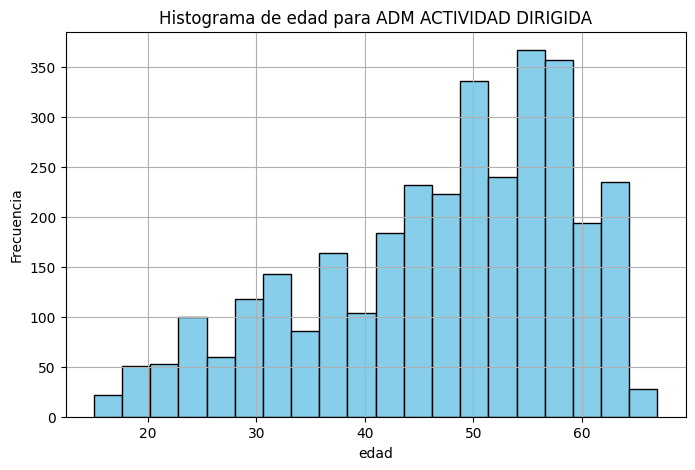

In [235]:
histograma_abono(df_filtrado, 'edad')

<h10 style="color:skyblue;">Pero para poder centrarnos en aquellos que verdaderamente tenag valores atipicos  
hacemos un boxplot para poder tener la visualización correctad de que en que tipo de abono deberíamos centrarnos.</h10>

In [236]:
def boxplot_edad_por_abono(df, col_abono='tipo_de_abono', col_edad='edad'):
    """
    Genera un boxplot de la edad según el tipo de abono.

    Parámetros:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_abono (str): Nombre de la columna que contiene el tipo de abono.
        col_edad (str): Nombre de la columna que contiene la edad.
    """
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col_abono, y=col_edad)
    plt.xticks(rotation=45)
    plt.title('Boxplot de Edad por Tipo de Abono')
    plt.xlabel('Tipo de Abono')
    plt.ylabel('Edad')
    plt.tight_layout()
    plt.show()

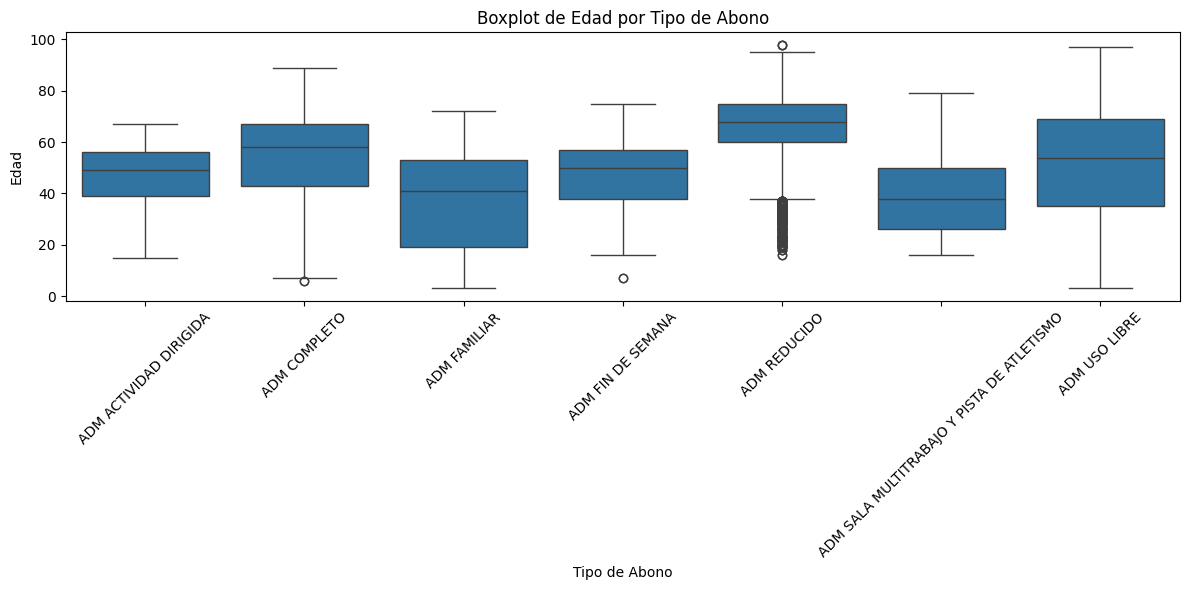

In [237]:
boxplot_edad_por_abono(df)

<h10 style="color:skyblue;">Tenemos gran número de valores atípicos en el ADM REDUCIDO, por lo que nos resulta llamativo y vamos a profundizar en ello.</h10>

In [240]:
def filtrar_adm_reducido(df, col_abono='tipo_de_abono'):
    """
    Nos centramos solo los registros con 'ADM REDUCIDO' en la columna de tipo de abono.

    """
    df_filtrado = df[df[col_abono].str.upper().str.strip() == 'ADM REDUCIDO']
    return df_filtrado


In [241]:
df_adm_reducido = filtrar_adm_reducido(df)
print(df_adm_reducido.head())

    nº_de_abonados   sexo  edad tipo_de_abono   centro_deportivo     mes
59             1.0  MUJER  39.0  ADM REDUCIDO  Alfredo Goyeneche  ene-25
60             1.0  MUJER  45.0  ADM REDUCIDO  Alfredo Goyeneche  ene-25
61             1.0  MUJER  46.0  ADM REDUCIDO  Alfredo Goyeneche  ene-25
62             1.0  MUJER  50.0  ADM REDUCIDO  Alfredo Goyeneche  ene-25
63             2.0  MUJER  51.0  ADM REDUCIDO  Alfredo Goyeneche  ene-25


In [242]:
def boxplot_adm_reducido_edad(df, col_abono='tipo_de_abono', col_edad='edad'):
    """
    Genera un boxplot de la edad solo para 'ADM REDUCIDO' y resalta los valores atípicos.


    """
    # Filtrar datos de ADM REDUCIDO
    df_reducido = df[df[col_abono].str.upper().str.strip() == 'ADM REDUCIDO']
    
    # Calcular IQR
    Q1 = df_reducido[col_edad].quantile(0.25)
    Q3 = df_reducido[col_edad].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    print(f"[ADM REDUCIDO] Límite inferior: {lim_inf:.2f}")
    print(f"[ADM REDUCIDO] Límite superior: {lim_sup:.2f}")

    # Detectar outliers
    outliers = df_reducido[(df_reducido[col_edad] < lim_inf) | (df_reducido[col_edad] > lim_sup)][col_edad]

    # Graficar boxplot
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df_reducido, y=col_edad, color='lightblue')

    # Añadir outliers como puntos rojos
    for outlier in outliers:
        plt.plot(1, outlier, 'ro')  # posición x = 1 porque solo hay una categoría

    plt.title('Boxplot de Edad para ADM REDUCIDO')
    plt.ylabel('Edad')
    plt.xticks([0], ['ADM REDUCIDO'])
    plt.tight_layout()
    plt.show()

    return outliers


[ADM REDUCIDO] Límite inferior: 37.50
[ADM REDUCIDO] Límite superior: 97.50


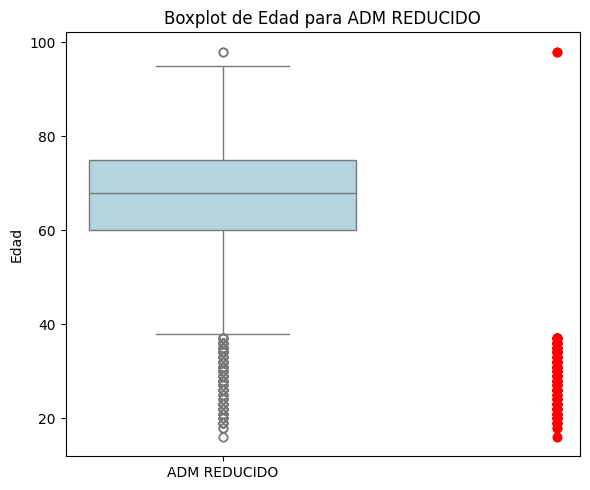

Valores atípicos de edad en ADM REDUCIDO:
 89       24.0
354      25.0
380      36.0
612      26.0
910      19.0
         ... 
36036    31.0
36037    35.0
36038    37.0
36367    20.0
36593    27.0
Name: edad, Length: 270, dtype: float64


In [243]:
outliers = boxplot_adm_reducido_edad(df)
print("Valores atípicos de edad en ADM REDUCIDO:\n", outliers)

<h10 style="color:skyblue;">Nos resulta llamativo los valores atípicos que se producen en este boxplot  
y que nos confirman futuros proyectos posibles en base a nuestras hipotesis.</h10>